# Importing Necessary Libraries 

In [1]:
import pandas as pd # To Load Datasets and Process Data
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # For ploting
import seaborn as sns # For Ploting
import math # For Mathematical Operations
%matplotlib inline

# Loading DataSet

In [2]:
#Loading the DataFrame Under the Variable "df"
df = pd.read_csv("/content/drive/MyDrive/Data Science Project/Projects/Project 002 - Red Wine/redwine.csv")

# Basic Properties

In [3]:
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.sample(5) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
324,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
1181,9.8,0.390,0.43,1.65,0.068,5.0,11.0,0.99478,3.19,0.46,11.4,5
67,6.6,0.705,0.07,1.60,0.076,6.0,15.0,0.99620,3.44,0.58,10.7,5
420,9.5,0.560,0.33,2.40,0.089,35.0,67.0,0.99720,3.28,0.73,11.8,7
590,9.0,0.450,0.49,2.60,0.084,21.0,75.0,0.99870,3.35,0.57,9.7,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isna().sum()  #It will find out the number of Null Values in a Feature

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

By analyzing basic info of the DataFrame, we can see that there is **1599** Row (or, **observation**) and **12** column (or, **Feature**) in this Dataset. The **Data Type** of all Features are fixed and **operable** and there are **no null** value there. So, now we can look for **Duplicates** in the Dataset.

In [7]:
# Checking for Duplicates in the Dataset
df.duplicated().sum()

240

So, There is **240 duplicate** value in the dataset. Now, we have to remove those duplicates.

In [8]:
df.drop_duplicates(subset = None, keep="first", inplace = True, ignore_index = False)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(1359, 12)

# Basic Statistics

In [11]:
df.describe()  #It will showcase descriptive statistics like mean, median, standard Deviation etc.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Creating function for Replacing Outliers (IQR Method)

In [12]:
def rep_outlier(x):
  q1 = x.quantile(0.25) # To find the 1st quantile
  q3 = x.quantile(0.7) # To find the 3rd quantile
  iqr = q3 - q1  # To Calculate Inter Quantile Range
  low_fence = q1 - (1.5 * iqr) # To Calculated Lower Fence for Outliers
  high_fence = q3 + (1.5 * iqr) # To Calculated Higher Fence for Outliers
  # This "for loop" to go line by line to find outliers and replace it with the mean
  for i in x:
    if (i>high_fence) or (i<low_fence):
      x.replace(i, np.nan, inplace = True)
  x.fillna(x.mean(), inplace = True)

# Looking For Outliers:

## Looking for outlier in "fixed acidity" Column:

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


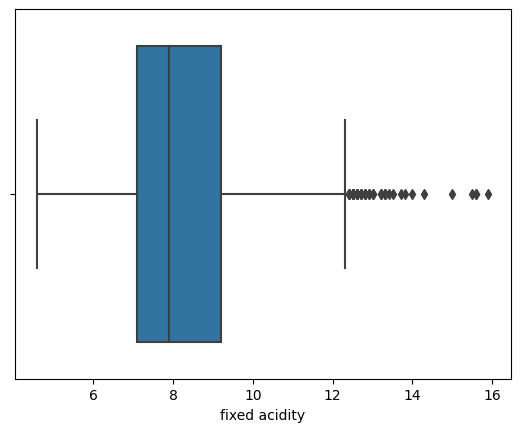

In [14]:
sns.boxplot(x = "fixed acidity", data = df)
plt.show()

From the Box Plot, we can see that there are some outliers in "**Fixed Acidity**" Column. So, we have replace them with appropriate value.

In [15]:
rep_outlier(df["fixed acidity"])

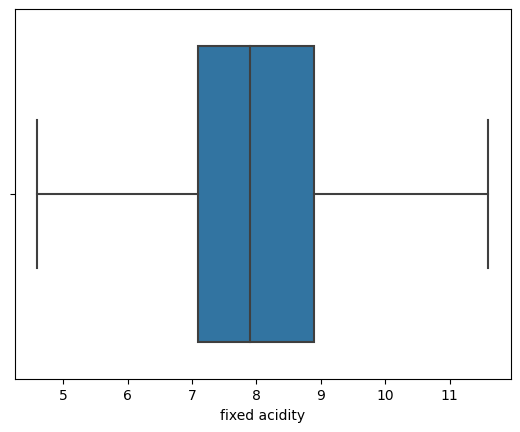

In [16]:
sns.boxplot(x = "fixed acidity", data = df)
plt.show()

## Looking for outlier in "volatile acidity" Column:

In [17]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


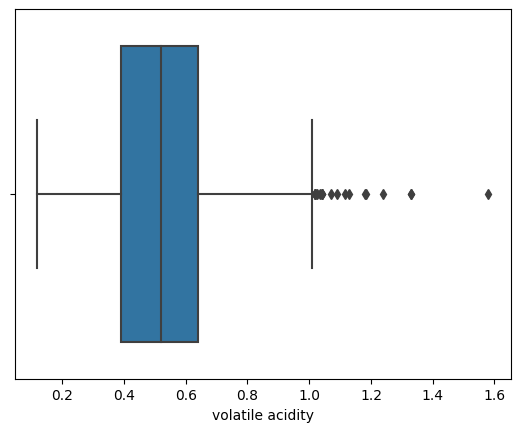

In [18]:
sns.boxplot(x = "volatile acidity",data = df)
plt.show()

From the Box Plot, we can see that there are some outliers in "**Volatile Acidity**" Column. So, we have replace them with appropriate value.

In [19]:
rep_outlier(df["volatile acidity"])

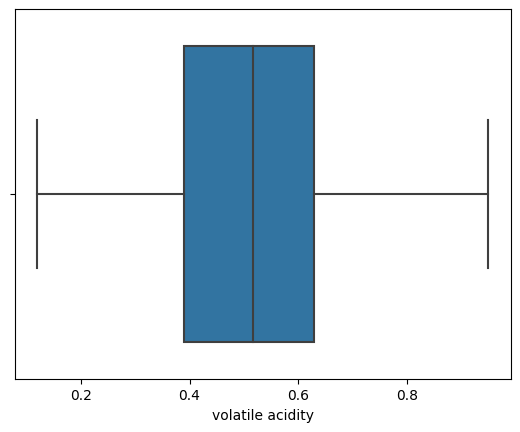

In [20]:
sns.boxplot(x = "volatile acidity",data = df)
plt.show()

## Looking for outlier in "citric acid" Column:


In [21]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


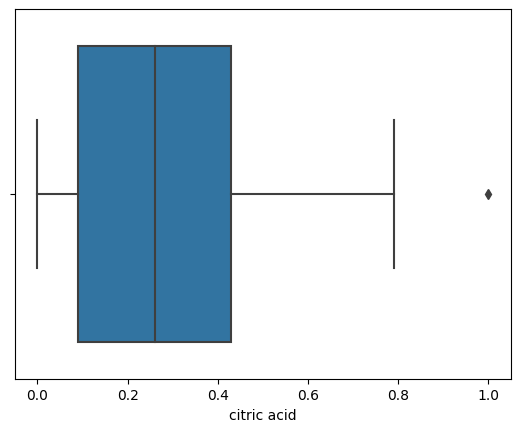

In [22]:
sns.boxplot(x = "citric acid",data = df)
plt.show()

From the Box Plot, we can see that there are some outliers in "**Citric Acid**" Column. So, we have replace them with appropriate value.

In [23]:
rep_outlier(df["citric acid"])

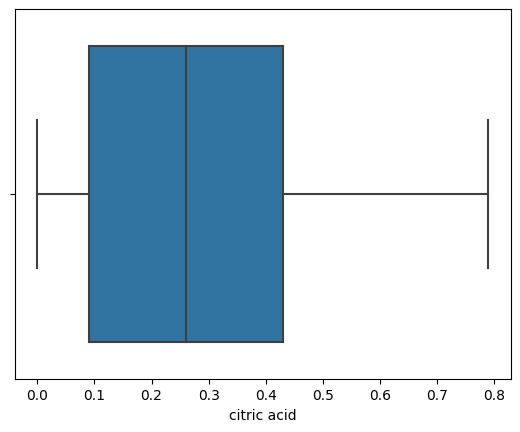

In [24]:
sns.boxplot(x = "citric acid",data = df)
plt.show()

## Looking for outlier in "residual sugar" Column:

In [25]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


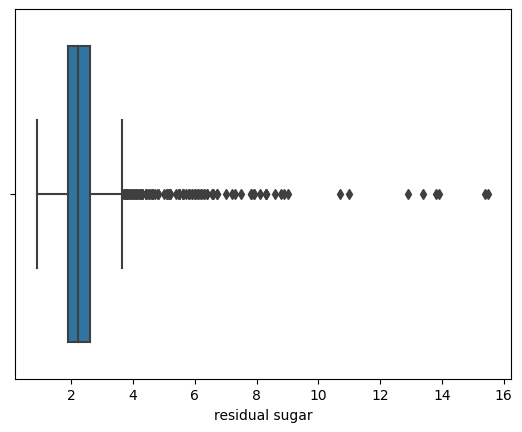

In [26]:
sns.boxplot(x = "residual sugar",data = df)
plt.show()

From the Box Plot, we can see that there are some outliers in "**Residual Sugar**" Column. So, we have replace them with appropriate value.

In [27]:
rep_outlier(df["residual sugar"])

In [28]:
rep_outlier(df["residual sugar"])

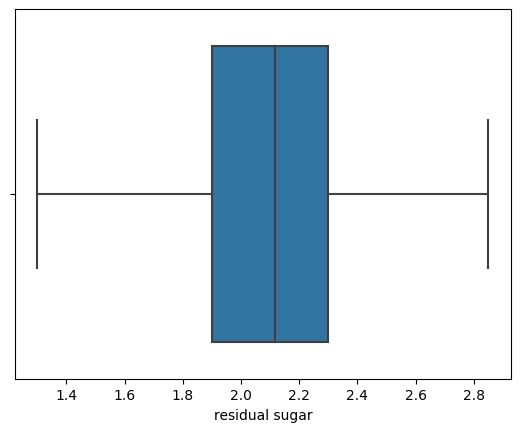

In [29]:
sns.boxplot(x = "residual sugar",data = df)
plt.show()

## Looking for outlier in "chlorides" Column:

In [30]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


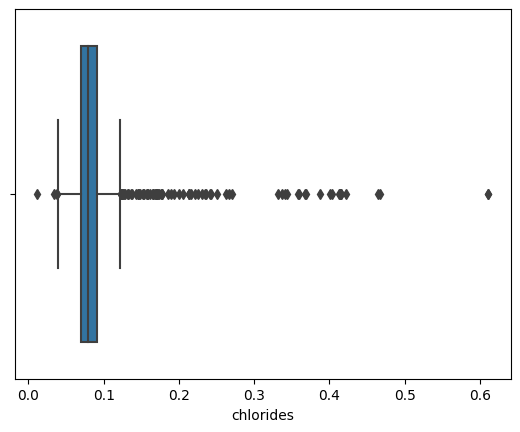

In [31]:
sns.boxplot(x = "chlorides",data = df)
plt.show()

From the Box Plot, we can see that there are some outliers in "**Chlorides**" Column. So, we have replace them with appropriate value.

In [32]:
rep_outlier(df["chlorides"])

In [33]:
rep_outlier(df["chlorides"])

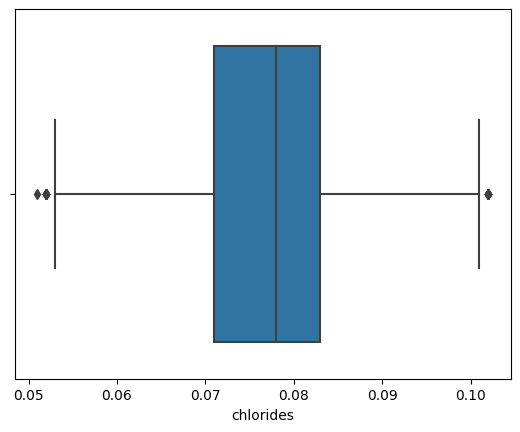

In [34]:
sns.boxplot(x = "chlorides",data = df)
plt.show()

## Looking for outlier in "free sulfur dioxide" Column:

In [35]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


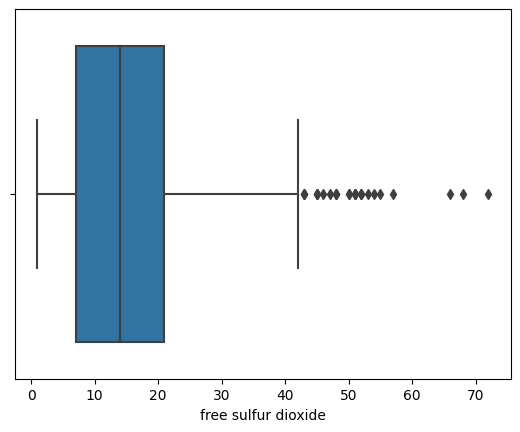

In [36]:
sns.boxplot(x = "free sulfur dioxide",data = df)
plt.show()

From the Box Plot, we can see that there are some outliers in "**Free Sulfur Dioxide**" Column. So, we have replace them with appropriate value.

In [37]:
rep_outlier(df["free sulfur dioxide"])

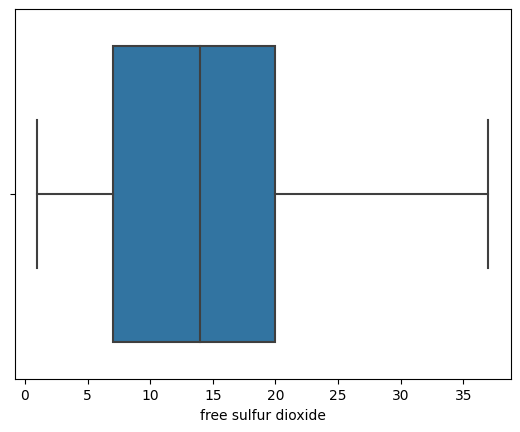

In [38]:
sns.boxplot(x = "free sulfur dioxide",data = df)
plt.show()

## Looking for outlier in "total sulfur dioxide" Column:

In [39]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


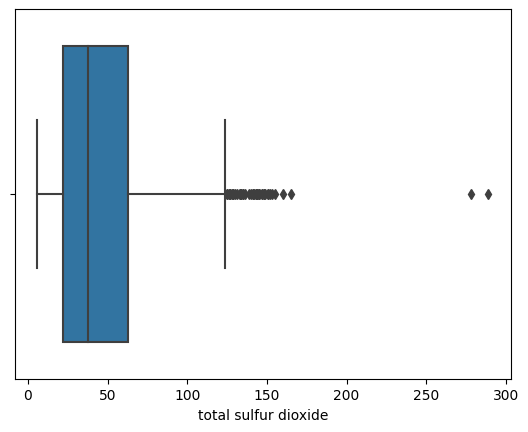

In [40]:
sns.boxplot(x = "total sulfur dioxide",data = df)
plt.show()

From the Box Plot, we can see that there are some outliers in "**Total Sulfur Dioxide**" Column. So, we have replace them with appropriate value.

In [41]:
rep_outlier(df["total sulfur dioxide"])

In [42]:
rep_outlier(df["total sulfur dioxide"])

In [43]:
rep_outlier(df["total sulfur dioxide"])

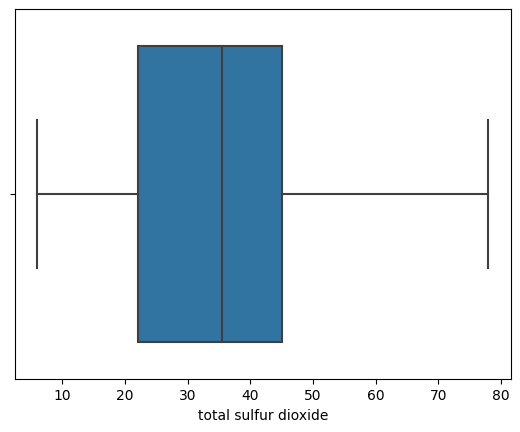

In [44]:
sns.boxplot(x = "total sulfur dioxide",data = df)
plt.show()

## Looking for outlier in "density" Column:

In [45]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


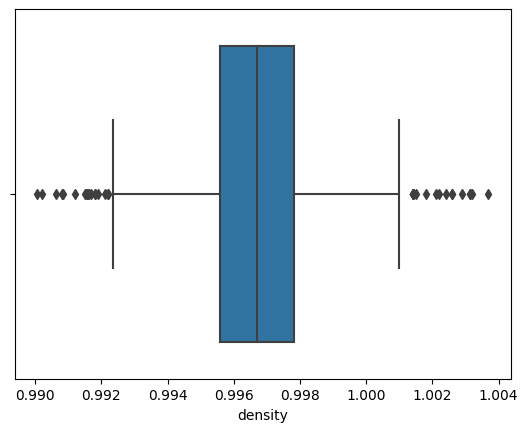

In [46]:
sns.boxplot(x = "density",data = df)
plt.show()


From the Box Plot, we can see that there are some outliers in "**Density**" Column. So, we have replace them with appropriate value.

In [47]:
rep_outlier(df["density"])

In [48]:
rep_outlier(df["density"])

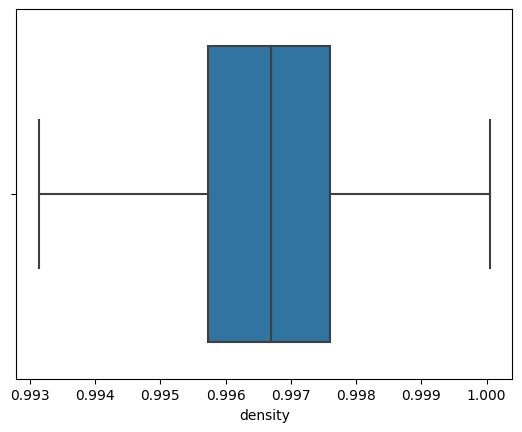

In [49]:
sns.boxplot(x = "density",data = df)
plt.show()

## Looking for outlier in "pH" Column:

In [50]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


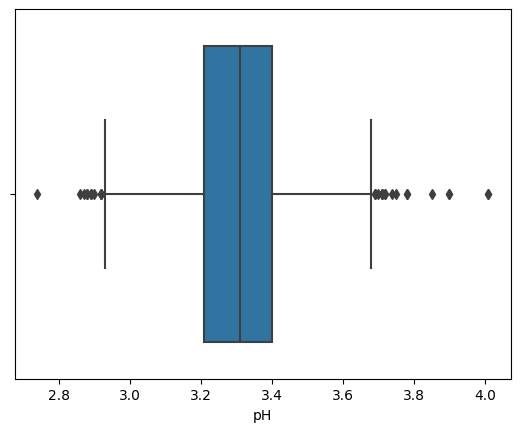

In [51]:
sns.boxplot(x = "pH",data = df)
plt.show()

From the Box Plot, we can see that there are some outliers in "**pH**" Column. So, we have replace them with appropriate value.

In [52]:
rep_outlier(df["pH"])

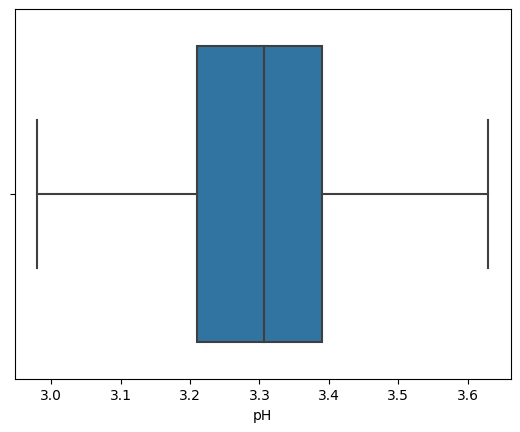

In [53]:
sns.boxplot(x = "pH",data = df)
plt.show()

## Looking for outlier in "sulphates" Column:

In [54]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


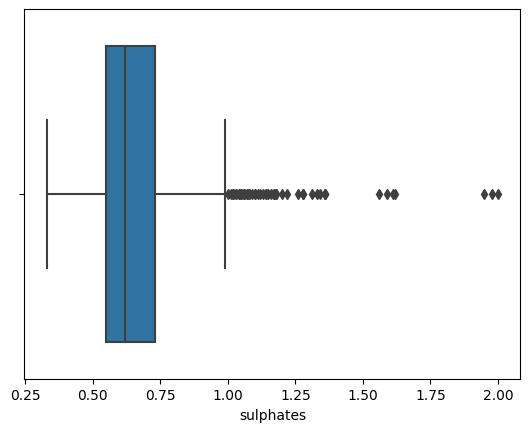

In [55]:
sns.boxplot(x = "sulphates",data = df)
plt.show()

From the Box Plot, we can see that there are some outliers in "**Sulphates**" Column. So, we have replace them with appropriate value.

In [56]:
rep_outlier(df["sulphates"])

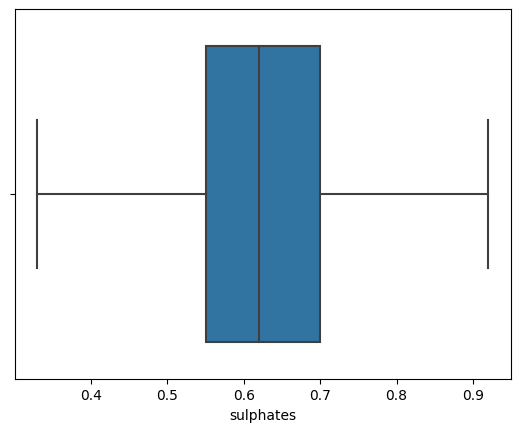

In [57]:
sns.boxplot(x = "sulphates",data = df)
plt.show()

## Looking for outlier in "alcohol" Column:

In [58]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


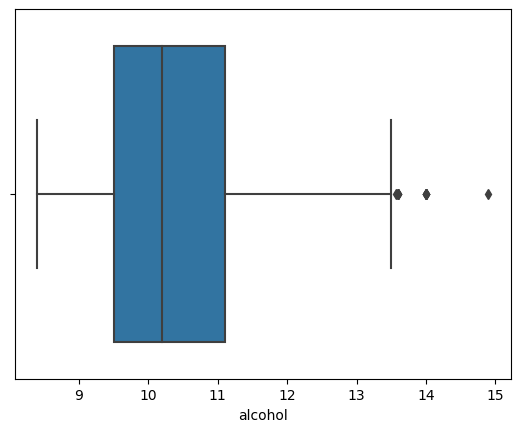

In [59]:
sns.boxplot(x = "alcohol",data = df)
plt.show()

From the Box Plot, we can see that there are some outliers in "**Alcohol**" Column. So, we have replace them with appropriate value.

In [60]:
rep_outlier(df["alcohol"])

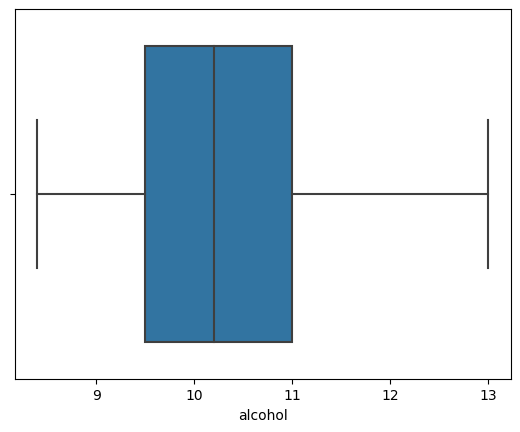

In [61]:
sns.boxplot(x = "alcohol",data = df)
plt.show()

# Cheking the distribution with KDE(Kernel Distribution Estimation) plot

In [62]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Fixed Acidity

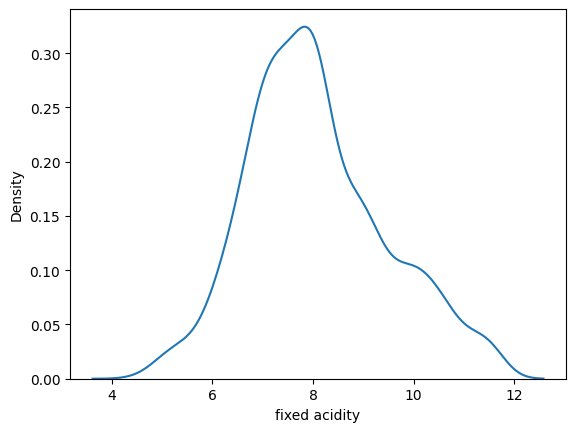

In [63]:
sns.kdeplot(df["fixed acidity"])
plt.show()

From the **KDE Plot**, we can see that the distribution of **Fixed Acidity** is **Normal**.

## Volatile Acidity

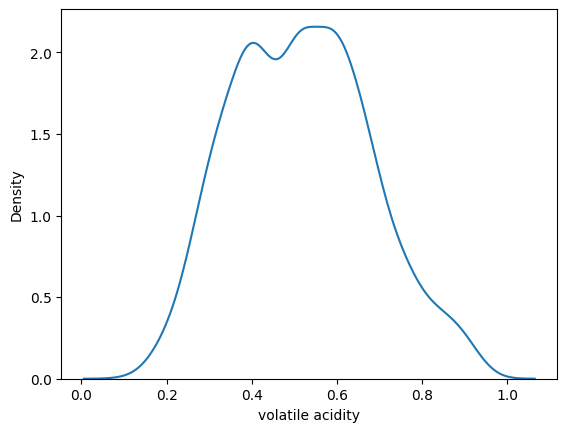

In [64]:
sns.kdeplot(df["volatile acidity"])
plt.show()

From the **KDE Plot**, we can see that the distribution of **Volatile Acidity** is **Normal**.

## Citric Acid

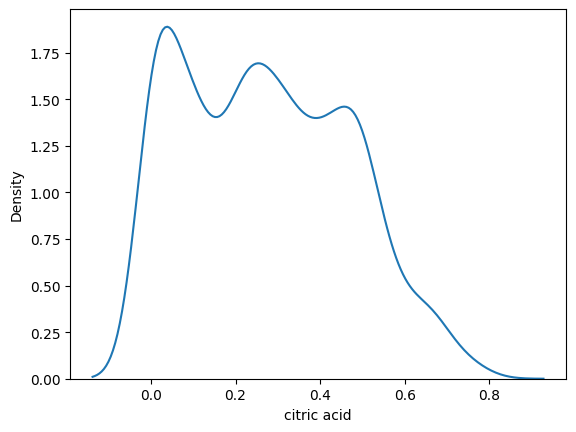

In [65]:
sns.kdeplot(df["citric acid"])
plt.show()

From the **KDE Plot**, we can see that the distribution of **Citric Acid** is **Right Skewed**.

## Residual Sugar

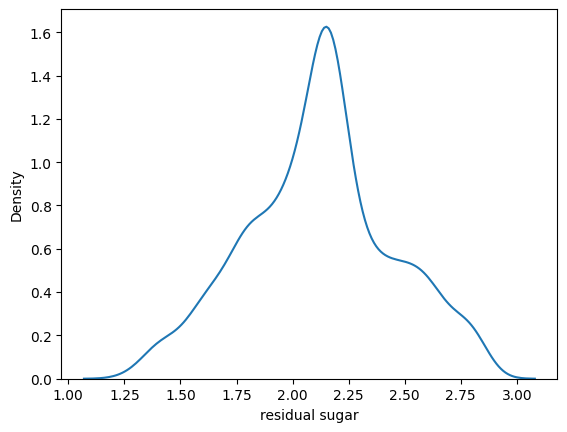

In [66]:
sns.kdeplot(df["residual sugar"])
plt.show()

From the **KDE Plot**, we can see that the distribution of **Residual sugar** is **Normal**.

## Chlorides

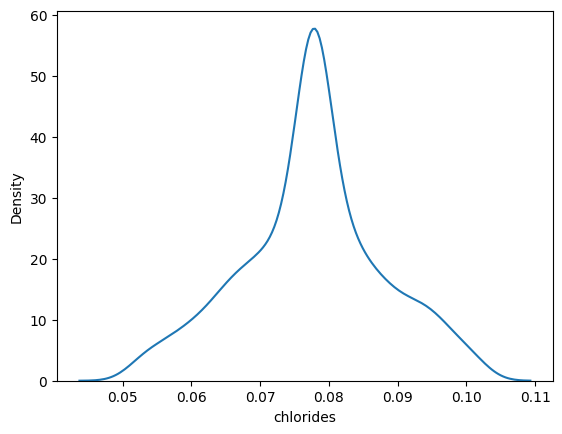

In [67]:
sns.kdeplot(df["chlorides"])
plt.show()

From the **KDE Plot**, we can see that the distribution of **Chlorides** is **Normal**.

## Free Sulfur Dioxide

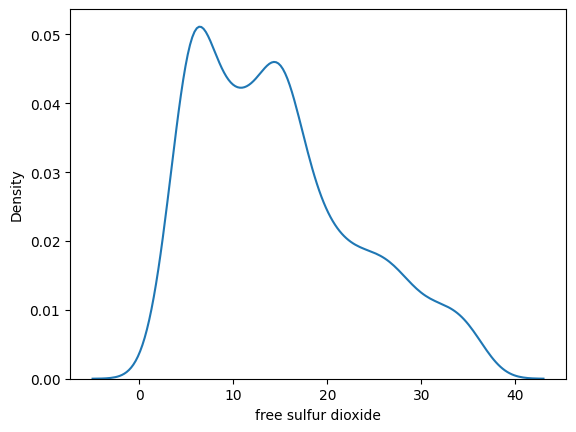

In [68]:
sns.kdeplot(df["free sulfur dioxide"])
plt.show()

From the **KDE Plot**, we can see that the distribution of **Free Sulfur** is **Right Skewed**.

## Total Sulfur Dioxide

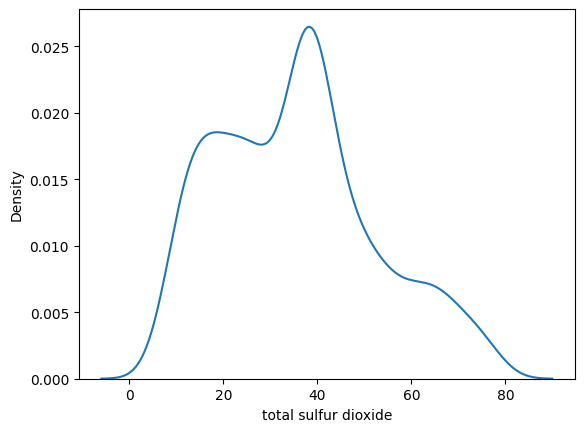

In [69]:
sns.kdeplot(df["total sulfur dioxide"])
plt.show()

From the **KDE Plot**, we can see that the distribution of **Total Sulfur Dioxide** is **Normal**.

## Density

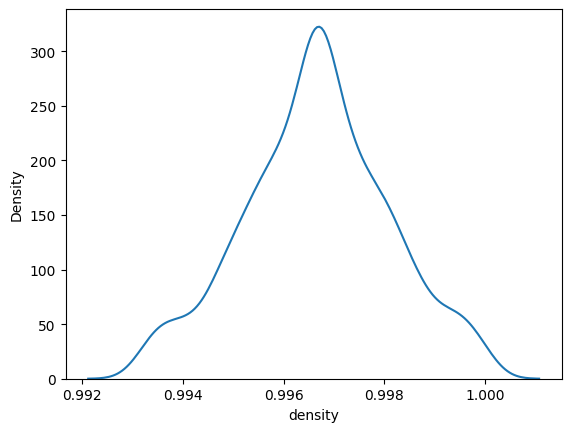

In [70]:
sns.kdeplot(df["density"])
plt.show()

From the **KDE Plot**, we can see that the distribution of **Density** is Normal.

## pH

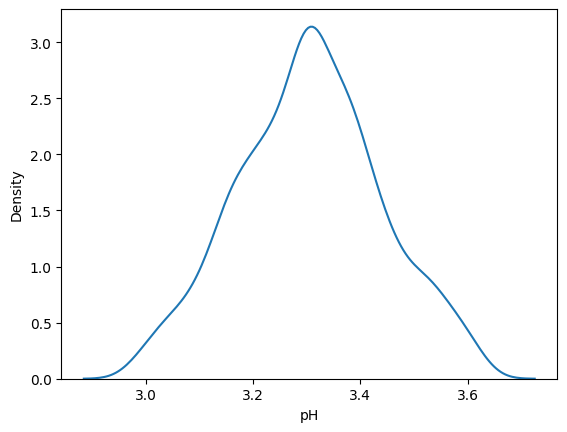

In [71]:
sns.kdeplot(df["pH"])
plt.show()

From the **KDE Plot**, we can see that the distribution of **pH** is **Normal**.

## Sulphates

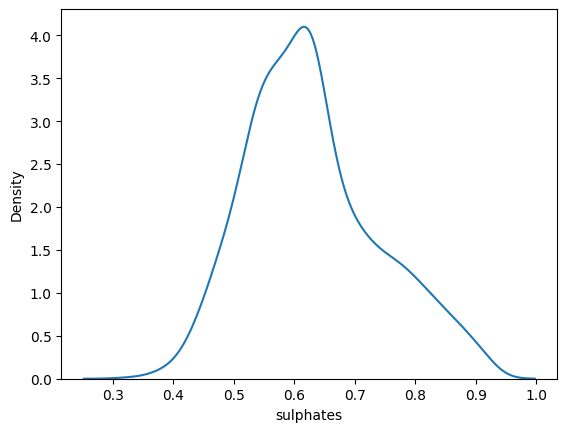

In [72]:
sns.kdeplot(df["sulphates"])
plt.show()

From the **KDE Plot**, we can see that the distribution of **Sulphates** is **Normal**.

## Alcohol

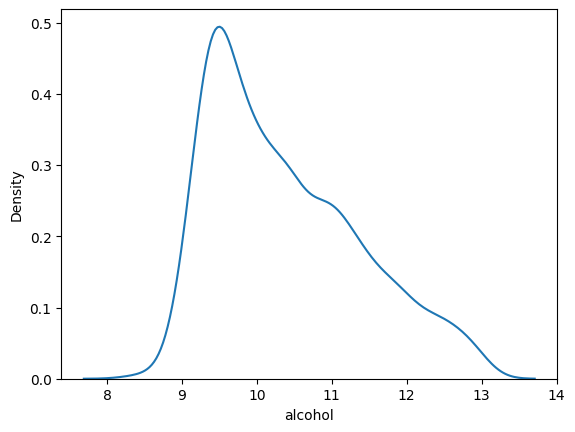

In [73]:
sns.kdeplot(df["alcohol"])
plt.show()

From the **KDE Plot**, we can see that the distribution of **Alcohol** is **Right Skewed**.